In [384]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

#load cifar100, display a random image
#(train_data, val_data, test_data), metadata = tfds.load(
#    'cifar10',
#    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
#    with_info=True,
#    #as_supervised=True,
#)
#num_classes = metadata.features['label'].num_classes
#print(num_classes)

#get_label_name = metadata.features['label'].int2str



# Load CIFAR-10 dataset
(train_data, val_data, test_data), info = tfds.load('cifar10', split=['train[:80%]', 'train[80%:]', 'test'], 
                                             with_info=True, as_supervised=True)

# Define preprocessing function
IMG_SIZE = 32

def preprocess_image(image, label):
    image = tf.cast(image, tf.float32)
    image = (image / 255.0)
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

# Apply preprocessing function to datasets
train_data = train_data.map(preprocess_image)
val_data = val_data.map(preprocess_image)
test_data = test_data.map(preprocess_image)

# Shuffle and batch datasets
BATCH_SIZE = 32

train_data = train_data.shuffle(buffer_size=10000)
train_data = train_data.batch(BATCH_SIZE)

val_data = val_data.batch(BATCH_SIZE)

test_data = test_data.batch(BATCH_SIZE,drop_remainder=True)

#image, label = next(iter(train_data))#.shuffle(1000)
#_ = plt.imshow(image)
#_ = plt.title(get_label_name(label))

#resize and rescale images
#IMG_SIZE = 32

#resize_and_rescale = tf.keras.Sequential([
#  layers.Resizing(IMG_SIZE, IMG_SIZE),
#  layers.Rescaling(1./255)
#])
#result = resize_and_rescale(image)
#_ = plt.imshow(result)
#_ = plt.title(get_label_name(label))

#print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

#augument the data
#data_augmentation = tf.keras.Sequential([
#  layers.RandomFlip("horizontal_and_vertical"),
#  layers.RandomRotation(0.2),
#])
# Add the image to a batch.
#image = tf.cast(tf.expand_dims(image, 0), tf.float32)

#display augumented images
#plt.figure(figsize=(10, 10))
#for i in range(9):
#  augmented_image = data_augmentation(image)
#  res=resize_and_rescale(augmented_image)
#  ax = plt.subplot(3, 3, i + 1)
#  plt.imshow(res[0])
#  plt.axis("off")



In [385]:
import os

#train_data=train_data.batch(32)
#val_data=val_data.batch(32)
#test_data=test_data.batch(32,drop_remainder=True)

#resize and rescale images - redefine since we are using batches of images now
IMG_SIZE = 32

#resize_and_rescale = tf.keras.Sequential([ 
#  layers.Resizing(IMG_SIZE, IMG_SIZE),
#  layers.Rescaling(1./255)
#])
#result = resize_and_rescale(image)
#_ = plt.imshow(result)
#_ = plt.title(get_label_name(label))

#print("Min and max pixel values:", result.numpy().min(), result.numpy().max())

#augument the data
#data_augmentation = tf.keras.Sequential([
#  layers.RandomFlip("horizontal_and_vertical"),
#  layers.RandomRotation(0.2),
#])
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.1),
    ]
)
def build_model(dropout_rate=0.2):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(32, 32, 3)),
        data_augmentation,
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    # Train the model
    history = model.fit(train_data, epochs=10, validation_data=val_data, batch_size=32)

    # Save the model
    model.save('models/CNNCIFAR10.h5')
    return model

if not os.path.exists('models/CNNCIFAR10.h5'):
    model=build_model()
else:
    model=tf.keras.models.load_model('models/CNNCIFAR10.h5')

In [386]:
test_loss, test_acc = model.evaluate(test_data) #since we specified metrics=[accuracy], evaluate() returns test_acc too.
                                                #dont pass labels since test_data contains them as it is a dataset
print('Test loss:', test_loss)
print('Test accuracy:', test_acc) 

312/312 [==============================] - 4s 13ms/step - loss: 0.9553 - accuracy: 0.6730
Test loss: 0.9553128480911255
Test accuracy: 0.6729767918586731


tf.Tensor(8, shape=(), dtype=int64)


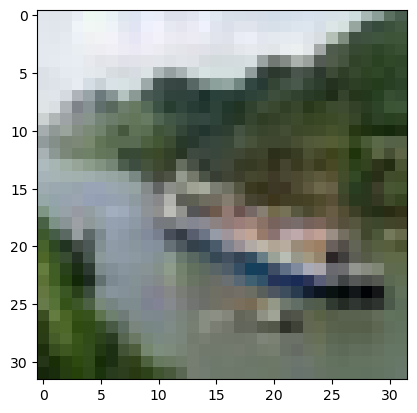

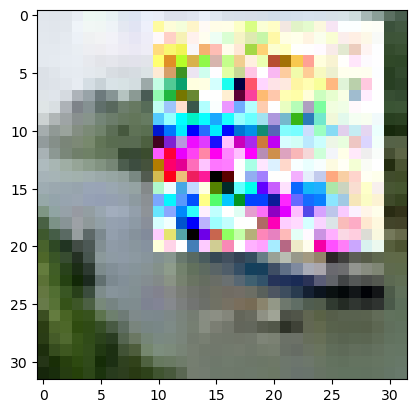

1/1 [==============================] - 0s 92ms/step
Original prediction: 8
1/1 [==============================] - 0s 33ms/step
Prediction with patch: 8


In [387]:
import numpy as np
import random

test_data=test_data.shuffle(1000).take(1)
for i, (image, labels) in enumerate(test_data):
  img=image[0, ...]
  label=labels[0]
print(label)
#test_batch=test_data.take(1)
#test_img=test_batch.take(1)
#for img,label in test_batch.take(1):
    #img,label=batch
#    print(f"Label of the image: {label.numpy()}")

#    tf.keras.preprocessing.image.array_to_img(img.numpy()).show()


#import matplotlib.pyplot as plt
# Select a random image from the test set
#test_data_np = tfds.as_numpy(test_data) #tfds.load returns a BatchDataset object which is not subscriptable. instead convert it to a numpy array then we can subscript to choose a random image
#img = test_data_np[np.random.randint(len(test_data_np))]
#print(list(test_data))
#img,label = next(iter(test_data))#.shuffle(1000)
#img=img[0]
#label=label[0]
#_ = plt.imshow(img)
#_ = plt.title(get_label_name(label))
#plt.show()
#print(img)
#resize and rescale images
#IMG_SIZE = 32

#resize_and_rescale = tf.keras.Sequential([
#  layers.Resizing(IMG_SIZE, IMG_SIZE),
#  layers.Rescaling(1./255)
#])
#img = resize_and_rescale(img)
#_ = plt.imshow(img)
#_ = plt.title(get_label_name(label))
#plt.show()
#print(img)
#img = test_data.shuffle(1000).take(1)
#for element in img.as_numpy_iterator():
#    img=element[0][0]
#for i,l in img:
#    i=img
#print(img)
#img=img.as_numpy()
#img = next(iter(test_data))['image']
#img = tf.cast(img, tf.float32) / 255.0
#img=img.reshape((32, 32, 3))
#print(img)
#plt.imshow(img)
#plt.show()
# Define the target class (toaster)
target_class = 1# 95 in cifar100

# Generate the adversarial patch
patch_size = 20
#index = tf.constant([[6, 6], [26, 6], [6, 26], [26, 26]])
#indices = tf.stack(tf.meshgrid(tf.range(6, 26), tf.range(6, 26), indexing='ij'), axis=-1) #6 is x,y start, 26 is x,y end (size of patch). 
#center = tf.constant([6, 6])
#indices = center + tf.stack(tf.meshgrid(tf.range(20), tf.range(20), indexing='ij'), axis=-1)
#x_coords, y_coords = tf.meshgrid(tf.range(6, 26), tf.range(6, 26), indexing='ij')
#coords = tf.stack([x_coords, y_coords], axis=-1)
#indices = tf.expand_dims(coords, axis=-2)
#indices = tf.tile(indices, [1, 1, 3, 1])
#indices = tf.stack(tf.meshgrid(tf.range(6, 26), tf.range(6, 26)), axis=-1)
#indices = tf.concat([indices, tf.zeros((20, 20, 1), dtype=tf.int32)], axis=-1)
# Calculate the starting indices for placing U in the center of T
#T = tf.ones((32, 32, 3))
#U = tf.ones((20, 20, 3))
#start_index = (T.shape[0] - U.shape[0]) // 2
#end_index = start_index + U.shape[0]

# Create the indices to update in T
#indices = tf.stack(tf.meshgrid(tf.range(start_index, end_index), tf.range(start_index, end_index), indexing='ij'), axis=-1)
#center_x = (T.shape[0] - U.shape[0]) // 2
#center_y = (T.shape[1] - U.shape[1]) // 2
#x_indices = tf.range(center_x, center_x + U.shape[0])
#y_indices = tf.range(center_y, center_y + U.shape[1])
#z_indices = tf.range(0, U.shape[2])
#indices = tf.stack(tf.meshgrid(x_indices, y_indices, z_indices, indexing='ij'), axis=-1)
#indices=tf.constant([[[0:20,]]])

#print(indices)
patch_value = np.ones((patch_size, patch_size, 3))
#patch_value = tf.ones((patch_size, patch_size, 3))
#indices = tf.constant([[i, j] for i in range(patch_value[0], patch_value[0]+patch_size) for j in range(patch_value[1], patch_value[1]+patch_size)])
learning_rate = 10
num_iterations = 100
patch_value=tf.convert_to_tensor(patch_value, dtype=tf.float32)
ran_x=random.randint(11,20)
ran_y=random.randint(11,20)

def apply_patch(original_image,patch,x,y):
    #apply patch to img with center x,y
    #find out how many rows are above the patch and columns to the left of the patch:
    #center can only be between 12,12 and 21,21
    #get rows above patch
    #get rows inline with patch
    #get rows below patch
    #concatenate all downwards
    #print(x,y)
    above=tf.concat([original_image[:x-10,:y-10,:],original_image[x-10:,:y-10,:]],axis=0)
    inl=tf.concat([original_image[:x-10,y-10:y+10,:],patch,original_image[x+10:,y-10:y+10,:]],axis=0)
    #print(inl)
    #tf.print(inl,summarize=-1)
    #print(img[:x-10,y-10:y+10,:])
    below=tf.concat([original_image[:x-10,y+10:,:],original_image[x-10:,y+10:,:]],axis=0)
    patched_image=tf.concat([above,inl,below],axis=1)
    #tf.print(tf.math.equal(patched_image,original_image),summarize=-1)
    #tf.print(original_image,summarize=-1)
    #print(original_image)
    #tf.print(tf.math.equal(original_image,patched_image),summarize=-1)

    #tf.print(tf.math.equal(tf.concat([img[:x-10,y-10:y+10,:],patch,img[x+10:,y-10:y+10,:]],axis=0,inl),summarize=-1)
    #tf.print(tf.math.equal(tf.concat([img[:x-10,y-10:y+10,:],patch,img[x+10:,y-10:y+10,:]],axis=0),inl),summarize=-1)
    #print(patched_image)
    #patched_image=tf.concat([img_patch[:x-10,:,:],img_patch[x-10:,:y-10,:]],axis=0)
    #patched_image=tf.concat([patched_image,patch_value],axis=1)
    #patched_image=tf.concat([patched_image,img_patch[x+10:,y-10:y,:]],axis=1)
    #patched_image=tf.concat([patched_image,img_patch[x-10:,y+10:,:]],axis=1)
    return patched_image
plt.imshow(img)
plt.show()
for i in range(num_iterations):
    with tf.GradientTape() as tape:
        tape.watch(patch_value)
        #print(img)
        img_patch = np.copy(img)
        #patch_value = patch_value.numpy()
        img_patch = tf.convert_to_tensor(img_patch, dtype=tf.float32)
        #print(patch_value)
        #img_patch[0:patch_size, 0:patch_size, :] = patch_value
        #print(patch_value)
        #mask_patch=tf.reshape(patch_value,(32,32,3))
        #boolean_mask_patch=tf.equal(mask_patch, 1)
        #img_patch=tf.where(boolean_mask_patch,mask_patch,img_patch)
        # Replace the top left 20x20 region with zeros
        #patched_image=tf.concat([patch_value,img_patch[:20,20:,:]],axis=1)
        #patched_image=tf.concat([patched_image,img_patch[20:,:,:]],axis=0)
        #plt.imshow(img_patch.numpy())
        #plt.show()
        #print(img_patch)
        #tf.print(img_patch,summarize=-1)
        img_patch=apply_patch(img_patch,patch_value,ran_x,ran_y)
        #tf.print(img_patch,summarize=-1)
        #print(img_patch)
        #img_patch = tf.tensor_scatter_nd_update(img_patch, indices, patch_value)
        #print(patch_value)
        #print(patched_image)
        #plt.imshow(img_patch.numpy())
        #plt.show()
        #print(img_patch)
        predictions = model(img_patch[np.newaxis, ...])
        #print(predictions)
        loss = -predictions[0][target_class]
        #print(loss)
        #print(patch_value)
        #tape.watch(patch_value)
        #print(patch_value)
        #tf.print(tf.math.equal(tf.concat([img[:x-10,y-10:y+10,:],patch,img[x+10:,y-10:y+10,:]],axis=0,inl),summarize=-1)
        #tf.print(patched_image,summarize=-1)
        #tf.print(tf.math.equal(img_patch,patched_image),summarize=-1)
    gradients = tape.gradient(loss, patch_value)
    #print(gradients)
    #print(patch_value - learning_rate * gradients)
    patch_value = patch_value - learning_rate * gradients
    #print(patch_value)
    patch_value = tf.clip_by_value(patch_value, 0, 1)

# Apply the adversarial patch to the image
img_patch = np.copy(img)
img_patch = tf.convert_to_tensor(img_patch, dtype=tf.float32)
patched_image=apply_patch(img_patch,patch_value,ran_x,ran_y)

#patched_image=tf.concat([patch_value,img_patch[:20,20:,:]],axis=1)
#patched_image=tf.concat([patched_image,img_patch[20:,:,:]],axis=0)
#img_patch[0:patch_size, 0:patch_size, :] = patch_value
#img_patch = tf.tensor_scatter_nd_update(img_patch, indices, patch_value)

plt.imshow(patched_image.numpy())
plt.show()

# Check the model's prediction on the original image
prediction_orig = model.predict(img[np.newaxis, ...])
print('Original prediction:', np.argmax(prediction_orig))

# Check the model's prediction on the image with the adversarial patch
prediction_patch = model.predict(img_patch[np.newaxis, ...])
print('Prediction with patch:', np.argmax(prediction_patch))